### 1. Rolx algorithm

In [1]:
!pip install graphrole

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [2]:
import warnings
from pprint import pprint

import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

from graphrole import RecursiveFeatureExtractor, RoleExtractor

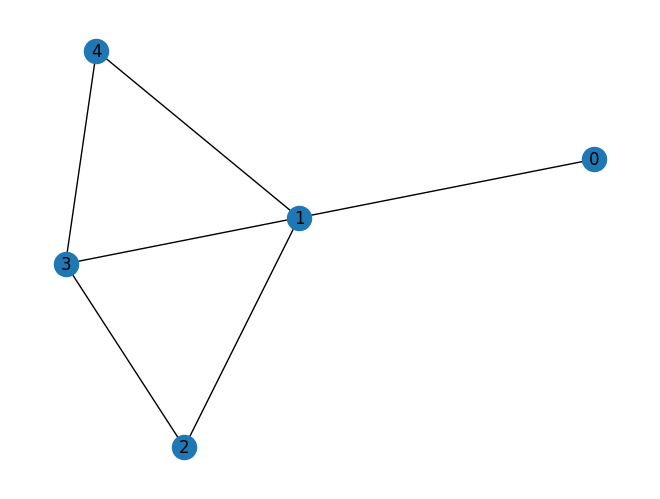

In [3]:
G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1),
                   (1, 2),(1, 4),(1,3),(2, 3),(3, 4)])
nx.draw(G,with_labels = True)

In [4]:
# extract features from 1 recursive generations:
feature_extractor = RecursiveFeatureExtractor(G)
features = feature_extractor.extract_features()

print(f'\nFeatures extracted from {feature_extractor.generation_count} recursive generations:')
print(features)


Features extracted from 1 recursive generations:
   degree  external_edges
0       1               3
1       4               0
2       2               3
3       3               1
4       2               3


In [5]:
# assign node roles
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles = role_extractor.roles

print('\nNode role assignments:')
pprint(node_roles)

print('\nNode role membership by percentage:')
print(role_extractor.role_percentage.round(2))


Node role assignments:
{0: 'role_1', 1: 'role_0', 2: 'role_1', 3: 'role_0', 4: 'role_1'}

Node role membership by percentage:
   role_0  role_1
0    0.03    0.97
1    0.97    0.03
2    0.25    0.75
3    0.69    0.31
4    0.25    0.75


### 2. Learning with Local and Global Consistency

In [6]:
from networkx.algorithms import node_classification
G = nx.path_graph(4)
G.nodes[0]['label'] = 'A'
G.nodes[3]['label'] = 'B'
G.nodes(data=True)

G.edges()

predicted = node_classification.local_and_global_consistency(G)
predicted

['A', 'A', 'B', 'B']

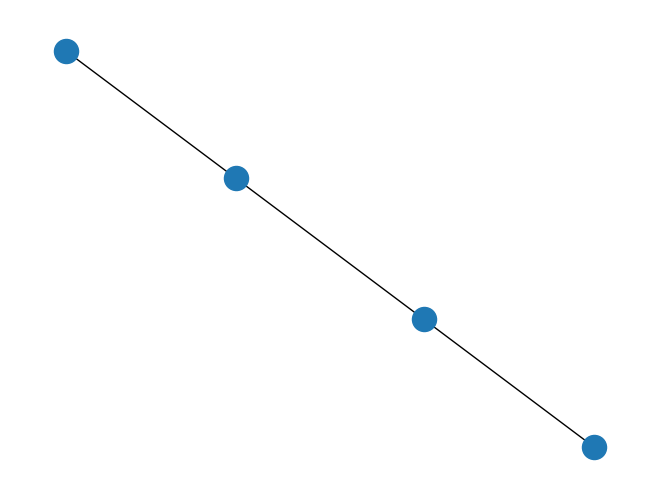

In [7]:
nx.draw(G)

In [8]:
#draw graph with different labeled nodes
def draw_graph(G):
    clubs = []  # list to populate with labels
    for n in G.nodes:
        c = G.nodes[n]['label']
        col = 0
        if c=='A':
            clubs.append('green')
        elif c =='B':
            clubs.append('red')
        else:
            clubs.append('black')
    pos = nx.spring_layout(G, seed=42) # To be able to recreate the graph layout
    nx.draw_networkx(G, pos=pos, node_color = clubs) # Plot the graph

In [9]:
from networkx.algorithms import node_classification
import networkx as nx

G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1),(0, 2),(0, 3),(0, 5),(1, 3), (1, 6),(3, 4),(4, 5),(4, 7),(4,8),(7,8)])


G.nodes[0]['label'] = 'A'
G.nodes[1]['label'] = 'A'
G.nodes[2]['label'] = ''
G.nodes[3]['label'] = 'A'
G.nodes[4]['label'] = 'B'
G.nodes[5]['label'] = 'B'
G.nodes[6]['label'] = 'A'
G.nodes[7]['label'] = 'B'
G.nodes[8]['label'] = 'B'

predicted = node_classification.local_and_global_consistency(G)
predicted

['A', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'B']

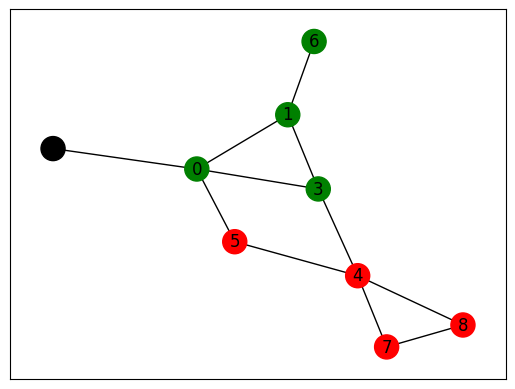

In [10]:
draw_graph(G)

### Learning with Harmonic Function

In [11]:
from networkx.algorithms import node_classification

G = nx.path_graph(4)


G.nodes[0]["label"] = "A"
G.nodes[3]["label"] = "B"
G.nodes(data=True)

NodeDataView({0: {'label': 'A'}, 1: {}, 2: {}, 3: {'label': 'B'}})

In [12]:
G.edges()

EdgeView([(0, 1), (1, 2), (2, 3)])

In [13]:
predicted = node_classification.harmonic_function(G)
predicted

['A', 'A', 'B', 'B']

In [14]:
from networkx.algorithms import node_classification
import networkx as nx

G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1),(0, 2),(0, 3),(0, 5),(1, 3), (1, 6),(3, 4),(4, 5),(4, 7),(4,8),(7,8)])


G.nodes[0]['label'] = 'A'
G.nodes[1]['label'] = 'A'
G.nodes[2]['label'] = ''
G.nodes[3]['label'] = 'A'
G.nodes[4]['label'] = 'B'
G.nodes[5]['label'] = 'B'
G.nodes[6]['label'] = 'A'
G.nodes[7]['label'] = 'B'
G.nodes[8]['label'] = 'B'

predicted = node_classification.harmonic_function(G)
predicted

['A', 'A', '', 'A', 'B', 'A', 'B', 'B', 'B']

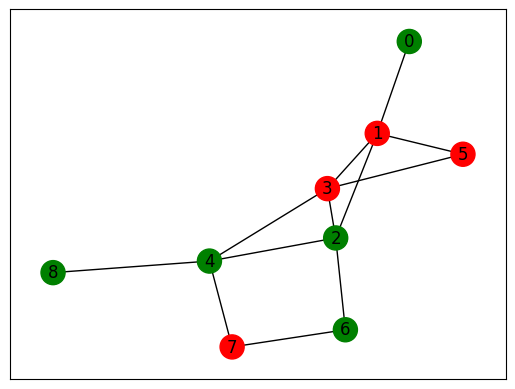

In [16]:
# Filling labels for graph G

def fill_labels(G):
    for i in range(len(G.nodes)):
        if i%2 ==0:
            G.nodes[i]['label'] = 'A'
        else:
            G.nodes[i]['label'] = 'B'
from networkx.algorithms import node_classification
G = nx.Graph()
G = nx.read_edgelist('./data/edge_list.txt')
mapping = {}
for i in G.nodes:
    mapping[f"{i}"] = int(i)
G = nx.relabel_nodes(G, mapping)

fill_labels(G)
draw_graph(G)

In [17]:
predicted = node_classification.harmonic_function(G)
predicted

['A', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'A']

### 4. Label propagation

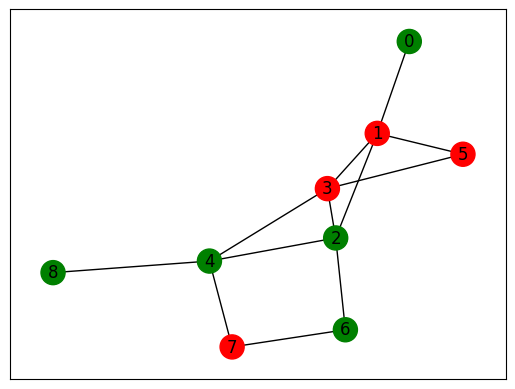

In [18]:
for i in range(len(G.nodes)):
    if G.nodes[i]['label']=='':
        G.nodes[i]['label']= predicted[i]

draw_graph(G)

In [19]:
G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7),
 (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16)])


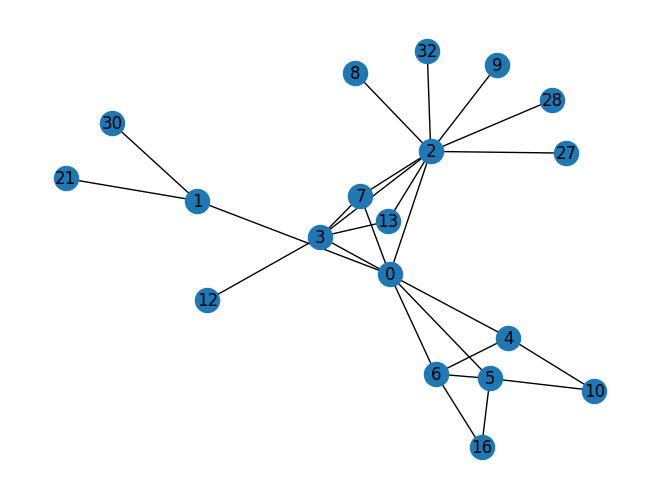

In [20]:
nx.draw(G,with_labels = True)

In [21]:
!pip install igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 18.2 MB/s eta 0:00:00


In [22]:
# Import libraries
import pandas as pd #For reading dataset files
import networkx as nx #For network creation/analysis
from networkx.algorithms import community
import community as community_louvain
import matplotlib.pyplot as plt #For plotting graphs
import igraph as ig
%matplotlib inline

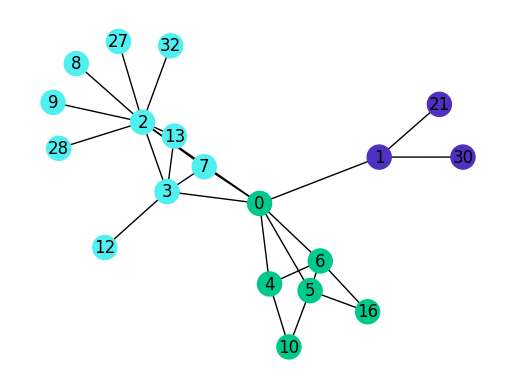

In [23]:
colors = ["#00C98D", "#5030C0", "#50F0F0"]
pos = nx.spring_layout(G)
lst_m = community.label_propagation_communities(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for c in lst_m:
  for n in c:
    color_map_b[n] = colors[counter]
  counter = counter + 1
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

## Node Features

In [24]:
import itertools
import random
import time
from collections import defaultdict
from typing import Callable, Dict, List, Optional, Tuple, Union

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [25]:
def seed_everything(seed: Optional[int] = None) -> None:
    random.seed(seed)
    np.random.seed(seed)


seed_everything(42)

In [26]:
edge_list = [("A", "C"), ("B", "C"), ("B", "D"), ("C", "D")]
G = nx.Graph(edge_list)

In [27]:
def features_example(
    feature_extraction_fun: Callable[[nx.Graph], Dict[Union[str, Tuple[str, str]], Union[int, float]]],
    fig_size: Tuple[int, int] = (6, 3),
    node_color: str = "tab:orange",
    node_size: int = 1000,
    width: int = 2,
    seed: Optional[int] = None,) -> None:



    name = feature_extraction_fun.__name__.replace("_", " ").capitalize()
    features = feature_extraction_fun(G)
    pos = nx.spring_layout(G, seed=seed)

    plt.figure(figsize=fig_size)
    nx.draw(G, pos=pos, node_color=node_color, node_size=node_size, width=width, with_labels=True)
    plt.show()

    print(f"\n{name} values:")
    for key, value in sorted(features.items(), key=lambda item: item[0]):
        print(f"- {key}: {value:.2f}")

### Node Degree

In [28]:
def node_degree(G: nx.Graph) -> Dict[str, int]:
    return dict(G.degree)

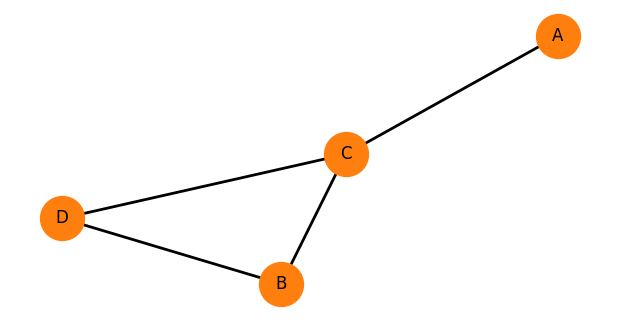


Node degree values:
- A: 1.00
- B: 2.00
- C: 3.00
- D: 2.00


In [29]:
features_example(node_degree, seed=42)

### Node Centrality - Eigenvector centrality

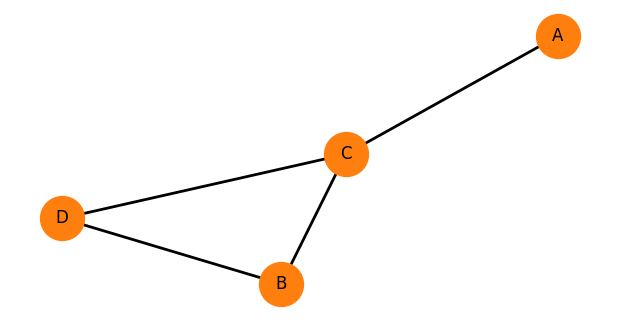


Eigenvector centrality values:
- A: 0.28
- B: 0.52
- C: 0.61
- D: 0.52


In [30]:
features_example(nx.eigenvector_centrality, seed=42)

### Node Centrality - Betweeness centrality

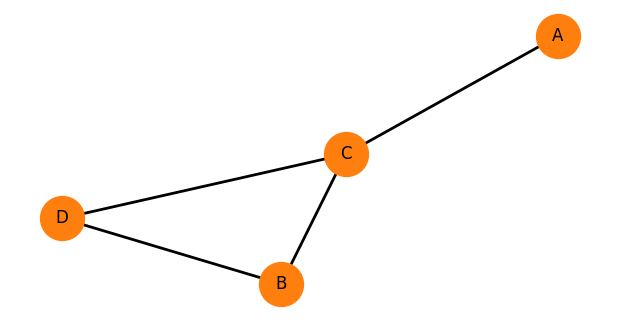


Betweenness centrality values:
- A: 0.00
- B: 0.00
- C: 0.67
- D: 0.00


In [31]:
features_example(nx.betweenness_centrality, seed=42)

### Node Centrality - Closeness centrality

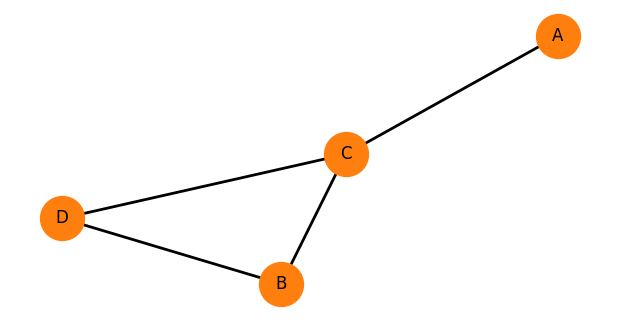


Closeness centrality values:
- A: 0.60
- B: 0.75
- C: 1.00
- D: 0.75


In [34]:
features_example(nx.closeness_centrality, seed=42)

### Node Centrality - Clustering Coefficient

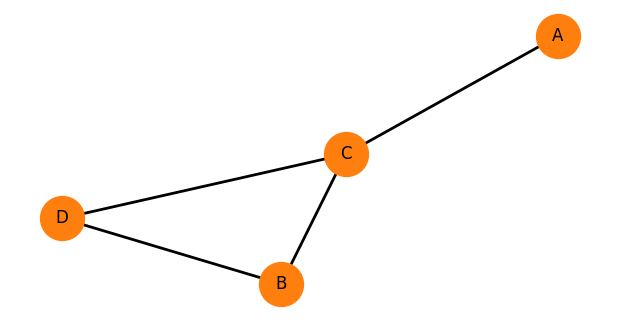


Clustering values:
- A: 0.00
- B: 1.00
- C: 0.33
- D: 1.00


In [33]:
features_example(nx.clustering, seed=42)

### Edge-level Features: Distance based feature

#### Shortest path

In [35]:
def shortest_path_length(G: nx.Graph) -> Dict[Tuple[str, str], int]:
    out = {}
    for node_pair in itertools.combinations(G.nodes, 2):
        out[node_pair] = nx.shortest_path_length(G, *node_pair)

    return out

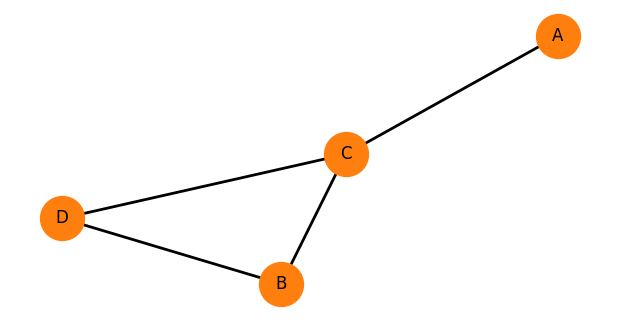


Shortest path length values:
- ('A', 'B'): 2.00
- ('A', 'C'): 1.00
- ('A', 'D'): 2.00
- ('B', 'D'): 1.00
- ('C', 'B'): 1.00
- ('C', 'D'): 1.00


In [36]:
features_example(shortest_path_length, seed=42)

### Local Neighborhood Overlap - Jaccard Coefficient

In [37]:
def jaccard_coefficient(G: nx.Graph) -> Dict[Tuple[str, str], float]:
    out = {}
    for item in nx.jaccard_coefficient(G, itertools.combinations(G.nodes, 2)):
        out[(item[:2])] = item[2]

    return out

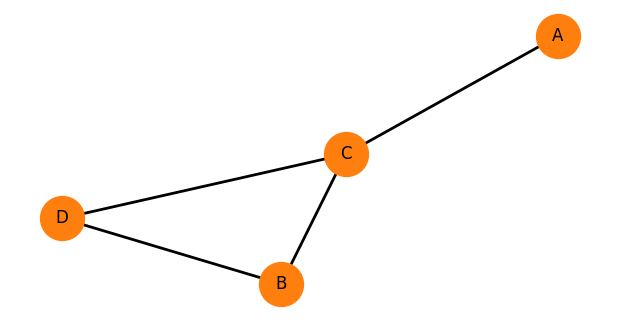


Jaccard coefficient values:


In [38]:
features_example(jaccard_coefficient, seed=42)

### Global Neighborhood Overlap

In [39]:
def get_katz_index_matrix(G: nx.Graph, beta: float) -> np.ndarray:
    A = nx.adjacency_matrix(G).todense()
    X = beta * A
    max_eigval = np.linalg.eigvals(X).max()
    if max_eigval >= 1.0:
        raise ValueError(
            "to apply the geometric series of matrices, the maximum eigenvalue of beta * A must be < 1, got "
            f"{max_eigval}"
        )

    I = np.eye(X.shape[0])
    S = np.linalg.inv(I - X) - I
    return S


def katz_index_beta_03(G: nx.Graph) -> Dict[Tuple[str, str], float]:
    S = get_katz_index_matrix(G, 0.3)
    nodes = list(G.nodes)
    ki = {}
    for node_pair in itertools.combinations(G.nodes, 2):
        row_idx = nodes.index(node_pair[0])
        col_idx = nodes.index(node_pair[1])
        ki[node_pair] = S[row_idx, col_idx]

    return ki


katz_index_beta_03.__name__ = "katz_index_(beta=0.3)"

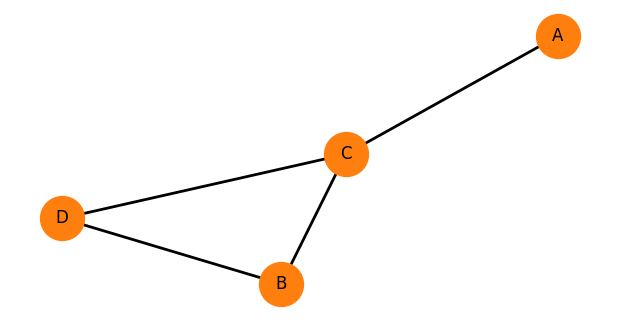


Katz index (beta=0.3) values:
- ('A', 'B'): 0.20
- ('A', 'C'): 0.46
- ('A', 'D'): 0.20
- ('B', 'D'): 0.61
- ('C', 'B'): 0.66
- ('C', 'D'): 0.66


In [40]:
features_example(katz_index_beta_03, seed=42)